CosmosCanvas: Mark Richardson, Gilles Ferrand and Jayanne English. 

This tutorial uses perceptual colour maps, designed to be displayed on a black background, for plotting velocity fields. These scripts use colourspace by Gilles Ferrand. The CosmosCanvas maps explore using compensating tones suggested by J. English; Compensating tones are produced when complementary colours are blended and should mix to neutral grey when balanced. This neutral grey is used to represent the systemic velocity in most cases, but can be assigned to the velocity of any salient feature. 
The set of default colour maps are defined in velmap.py 
    A. Single Divergence Point 
    B. Double Complement Plus Divergent  
A colour map is created using the central velocity ('div') and velocity limits. The colour scheme is plotted so that the user can ensure that div is in the correct position within the range.  Then the LCH are plotted to demonstrate that the Luminosity is monotonic (or contains a notch in luminosity at the desired value), the Chroma is within the gamut of the LCH phasespace gamut, and the Hue is well-behaved.  
Subsequently the galaxy fits file is loaded and the colour map is applied. This is shown for the two default maps listed above. Additionally how to customize a map is outlined. 
This notebook was produced by Jayanne English on July 25, 2022. It uses published ATNF ATCA data for its example. 

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Import our package and the colourspace package
import velmapLib as vmap
from colourspace import maps

convertor = 'custom' (illuminant = 'D65')


In [3]:
# Create the Single Divergence Point Default Colour Map. 
    # This map is straight forwardly monotonically decreasing in value from blueshift to redshift.
    # Only 2 colours complementary colours are employed to create compensating tones to either side of the grey divergent point.
    # Light cyan represents blueshift while dark orange-red represents redshift.   
    # The defaults for LCH values for this colour map exist in velmap.py. 
    
    # Colour saturation can be adjusted using the c_max parameter.  

# Set min/max values. 
# For div ==  systemic velocity, the min_ and max_values need to be equidistant in value from div.  
# Also div may require a decimal value (e.g. 2719.5) to place it in the centre of the scheme. 
# The velocity values should be entered here in the units of the momment 1 map, which could be in km/s or m/s.
min_value = 2676.0
max_value = 2760.0
div=2719.0

# Chroma max: 
c_max = 35.

# Create the Single Divergent Point Default velocity cmap.
# This uses default LCH values in the function "create_cmap_velocity" in velmapLib.py
cmapA = "CC-vmap-single-default"
vmap.create_cmap_velocity(min_value,max_value,name=cmapA, Cval_max=c_max,div=div)
# By default the colourmap is registered to the mpl namespace

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'CC-vmap-single-default' for Matplotlib (1020 steps)
registering cmap 'CC-vmap-single-default' to Matplotlib
writing ./cmaps/cmap_CC-vmap-single-default.png (32x1020)


writing  ./plots/testcmap_CC-velmap-single_CC-vmap-single-default.png


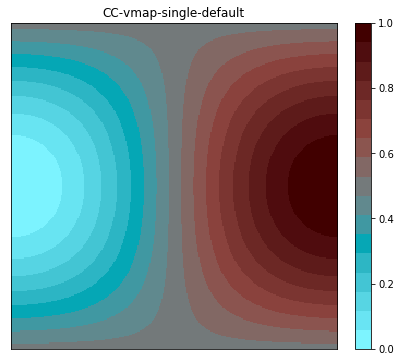

In [4]:
# Plot the scheme for quality control and store the plot.
    # Tip: If grey is not in the middle then adjust the min/max values to be symmetric around the div parameter. 
    #      Also add a decimal value to div to put it in the centre of the bin. 

maps.test_cmaps(names=[cmapA],nsteps=[17],subplots=(1,1),figsize=(15,6),fname="plots/testcmap_CC-velmap-single")

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_sRGB.npy


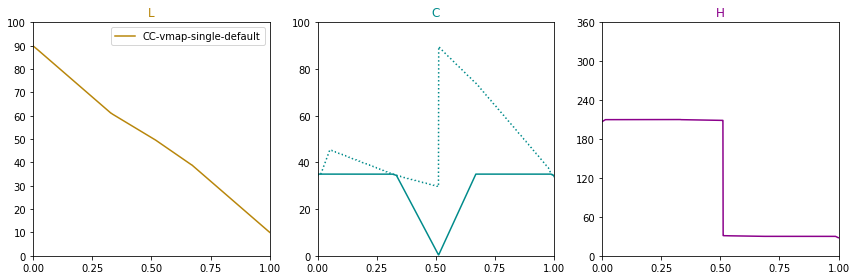

In [5]:
# Let's show the default colour map in LCH space.
# Again values are rescaled to 0:1 using the plot_path function.
    # The data values are on the x-axis. L==luminosity, C==chroma, H==hue are on the y-axis. 
    # L decreases to redshift values. C of 0 gives grey at the middle velocity value. 
    # Red hues are around 360/0 degrees on the colour wheel and the complementary colour differs by 180 degrees.
    # The dotted line traces the monitor's gamut.  See Gilles Ferrand's colourspace (https://github.com/gillesferrand/colourspace)

axes = maps.plot_path(cmapA, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmapA)

Let's apply this colour scheme to a FITS moment 1 velocity map. 

In [6]:
# First import our fits loading script and matlib requirements. 
import galfits as gal
import importlib
importlib.reload(gal)

<module 'galfits' from '/Users/english/pythonPackages/CosmosCanvas/galfits.py'>

In [7]:
# Set galaxy information
    # Take care that negative declinations have a minus sign all components of the coordinates. 
    # The field of view is adjusted by the radius parameter
# Published test data. 
title='NGC 3256c ATNF 1994'
fits_file="example_data/mom1linmosN3256c.na.clip3sig.pk6.2sig.fits"
RA = [10., 29., 03.85]    # hh.,mm.,ss.s
DEC = [-43., -50., -48.7] # deg.,arcmm.,arcss.s; southern declinations are -deg.,-arcmm.,-arcss.s
RADIUS = 0.0491667 # degrees

shift = [0.0, 0.0] # degrees

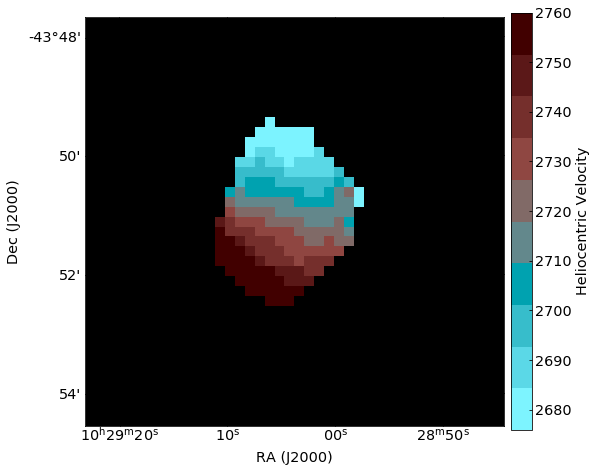

In [8]:
# Plot galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

#ticks = [min_value,-0.8,-0.45,-0.1,max_value]
nsteps= 10  
cbar_name = "Heliocentric Velocity"

# One can set the background to be black. In this case the beam is not plotted. 
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,RADIUS,shift,cmapA,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,show_beam=False,bkgrd_black=True,square=True)

# Note directory for the velocity field pngs. Change the name of your plot to avoid overwriting the results.
fig.savefig('plot_fields/plotSingleDivPt_N3256c.png', bbox_inches = "tight")

For the Double Complement Plus Divergent Default colour map, we use a two pairs of complements. This scheme with more variation in colour is designed for more omplex system.  The div point is still grey. The blueshift limit is turquoise, a warmer blue that perceptually approaches. Also in this map the grey div point luminosity is lightened in order to emphasize the minor axis.

In [9]:
# Double Complement Plus Divergent Default colour map.
# Change both the number of colours and the luminosities.  
    # Using double complements, (1) cyan to red-orange and (2) turquoise to rose. The computer monitor gamut
    # for cyan has limited variations so turquoise is added. 
    # Max Blueshift = Turquoise then as the velocity increases the hue transitions through cyan to grey 
    # then to dull red-orange and dark rose, which is the compliement of the turquoise.      
    # Luminosity change is used to make the systemic velocity light so the minor axis is obvious.  

# Set the saturation using Chroma max: 
c_max =50.

cmapB = "CC-vmap-DoubleLum-default"

cmapB=vmap.create_cmap_doubleVelocity(min_value,max_value,div=div,Cval_max=c_max,name=cmapB)
# By default the colourmap is registered to the mpl namespace
print(cmapB)


creating cmap 'CC-vmap-DoubleLum-default' for Matplotlib (1020 steps)
registering cmap 'CC-vmap-DoubleLum-default' to Matplotlib
writing ./cmaps/cmap_CC-vmap-DoubleLum-default.png (32x1020)
CC-vmap-DoubleLum-default


writing  ./plots/testcmap_CC-velmapDoubleLumDefault.png_CC-vmap-DoubleLum-default.png


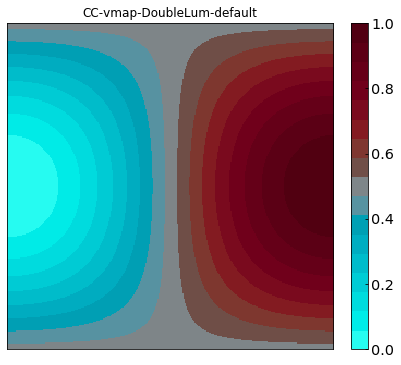

In [10]:
# Check the multiple divergent point colour map. 
maps.test_cmaps(names=[cmapB],nsteps=[17],subplots=(1,1),figsize=(15,6),fname="plots/testcmap_CC-velmapDoubleLumDefault.png")

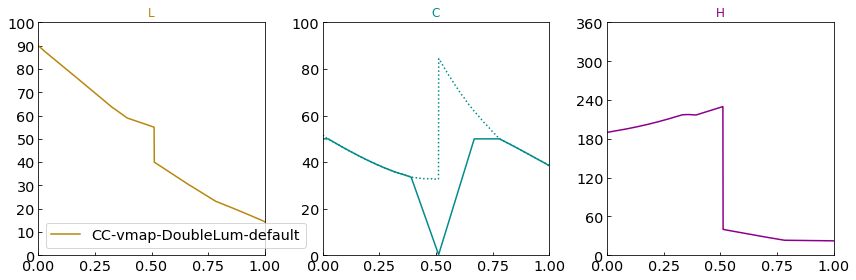

In [11]:
# Let's show the Double Complement Plus Divergent Default colour map in LCH space, again rescaled to 0:1 using the plot_path function.
# Notice the luminosity increase at the grey div value. 
axes = maps.plot_path(cmapB, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmapB)

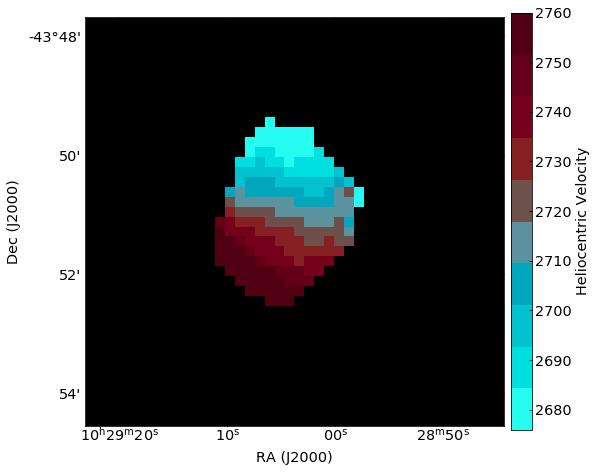

In [12]:
# Plot Double Complement Plus Luminosiy version of the galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

#ticks = [min_value,-0.8,-0.45,-0.1,max_value]
nsteps= 10  
cbar_name = "Heliocentric Velocity"

# One can set the background to be black. In this case the beam is not plotted. 
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,RADIUS,shift,cmapB,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,show_beam=False,bkgrd_black=True,square=True)

# Note directory for the velocity field pngs. Change the name of your plot to avoid overwriting the results.
fig.savefig('plot_fields/plotDoubleLum_N3256c.png', bbox_inches = "tight")

In [30]:
# Customize colour map.  
# This example of the Double Complement Plus Luminosity Map demonstrates how a user can adjust colours and luminosities. 
# Change both the number of colours and the luminosities.  
    # Using double complements, (1) cyan to red-orange and (2) turquoise to rose. The computer monitor gamut
    # for cyan has limited variations so turquoise is added. 
    # Max Blueshift = Turquoise then as the velocity increases the hue transitions through cyan to grey 
    # then to dull red-orange and dark rose, which is the compliement of the turquoise.      
    # Luminosity change is used to make the systemic velocity light so the minor axis is obvious.  

# Set the saturation using Chroma max: 
c_max =50.

# Select Hues, using degrees on the colour wheel: 
Hval_L=190. # Left for lowest data value.  Turquoise.
Hval_R=10.  # Right for highest data value. Rose.
Hval_1=210. # cyans
Hval_2=230.
Hval_3=40.  # Set this point, which is after grey midpoint, to higher (redshift) data values. While hue 50 is the complement to 230 but looks too brown.
Hval_4=30.

# Adjust luminosity: 
Lval_1=61. # This is the default value in .py file.
# Lval_2=55. #setting a value here does not permit a change in Lval_mid=85. 
Lval_2=None
Lval_mid=55.
Lval_3=40 
Lval_4=30
cmapB = "CC-vmap-DoubleLum-Customize"

vmap.create_cmap_velocity(min_value,max_value,name=cmapB, Cval_max=c_max,div=div,
                          Hval_L=Hval_L,Hval_R=Hval_R,Hval_1=Hval_1,Hval_2=Hval_2,Hval_3=Hval_3,Hval_4=Hval_4, 
                          Lval_mid=Lval_mid,Lval_1=Lval_1,Lval_2=Lval_2,Lval_3=Lval_3, Lval_4=Lval_4)
# By default the colourmap is registered to the mpl namespace



creating cmap 'CC-vmap-DoubleLum-Customize' for Matplotlib (1020 steps)
registering cmap 'CC-vmap-DoubleLum-Customize' to Matplotlib
writing ./cmaps/cmap_CC-vmap-DoubleLum-Customize.png (32x1020)


writing  ./plots/testcmap_CC-velmapCustomize1.png_CC-vmap-DoubleLum-Customize.png


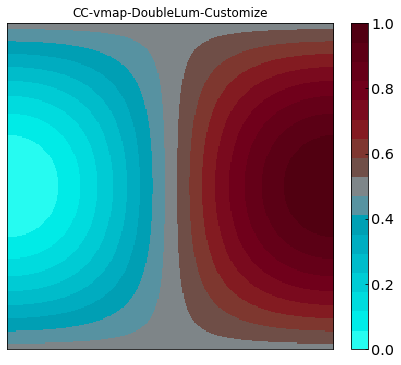

In [31]:
# Check the multiple divergent point colour map. 
maps.test_cmaps(names=[cmapB],nsteps=[17],subplots=(1,1),figsize=(15,6),fname="plots/testcmap_CC-velmapCustomize1.png")

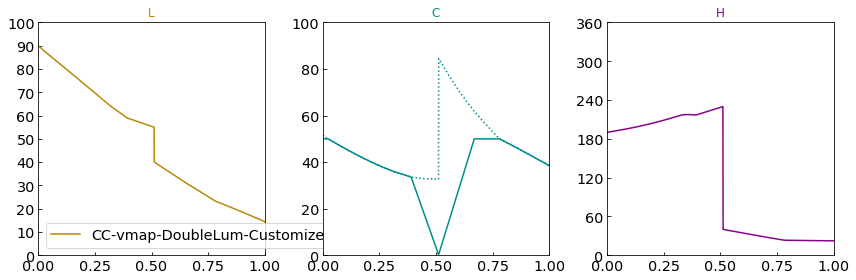

In [32]:
# Let's show the Double Complement Plus Divergent Default colour map in LCH space, again rescaled to 0:1 using the plot_path function.
# Notice the luminosity increase at the grey div value. 
axes = maps.plot_path(cmapB, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmapB)

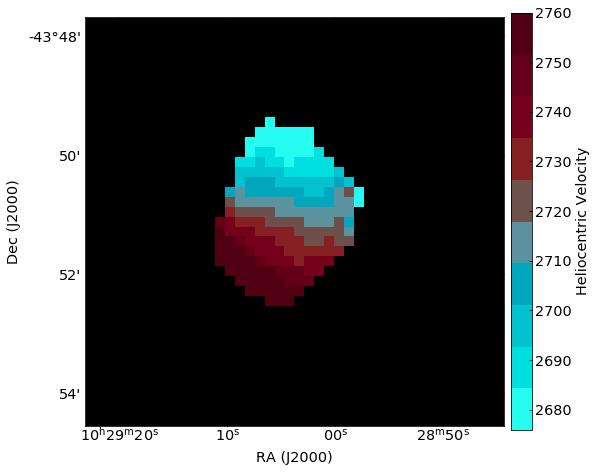

In [33]:
# Plot Double Complement Plus Luminosiy version of the galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

#ticks = [min_value,-0.8,-0.45,-0.1,max_value]
nsteps= 10  
cbar_name = "Heliocentric Velocity"

# One can set the background to be black. In this case the beam is not plotted. 
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,RADIUS,shift,cmapB,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,show_beam=False,bkgrd_black=True,square=True)

# Note directory for the velocity field pngs. Change the name of your plot to avoid overwriting the results.
fig.savefig('plot_fields/plotCustomize_N3256c.png', bbox_inches = "tight")